In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!pip install emnist
import emnist
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
import matplotlib.pyplot as plt
import os
%matplotlib inline

Using TensorFlow backend.


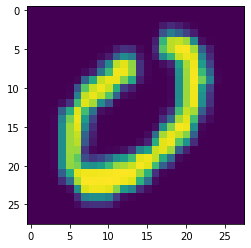

In [0]:
#Load Dataset
train_data,train_labels=emnist.extract_training_samples('bymerge')
test_data,test_labels=emnist.extract_test_samples('bymerge')
test=test_labels
plt.imshow(test_data[0])

In [0]:
#Reshaping Training Data to make 28X28 grid image
train_data=train_data.reshape(train_data.shape[0],28,28,1).astype('float32')
test_data=test_data.reshape(test_data.shape[0],28,28,1).astype('float32')

In [0]:
#Normalizing data
train_data=train_data/255
test_data=test_data/255

In [0]:
#One Hot Encoding
train_labels=np_utils.to_categorical(train_labels)
test_labels=np_utils.to_categorical(test_labels)

In [0]:
num_classes=train_labels.shape[1]

In [0]:
#Our Model
model = keras.models.Sequential()

In [0]:
#Adding Layer in following manner: 1st Convolutional, 2nd Pooling
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


In [0]:
model.add(Conv2D(32,(5,5),strides=(2,2),input_shape=(28,28,1), activation='relu',padding='same'))
model.add(MaxPooling2D())
#model.add(Conv2D(64,(3,3),strides=(1,1), activation='relu',padding='same'))
#model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3),strides=(1,1), activation='relu',padding='same'))
model.add(MaxPooling2D())

In [0]:
model.add(Flatten())
model.add(Dropout(0.3))

In [0]:
#model.add(Dense(units=1024,activation='relu'))
#model.add(Dropout(0.5))

In [0]:
#model.add(Dense(units=512,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.3))

In [0]:
model.add(Dense(units=num_classes,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               5

In [0]:
model.fit(train_data,train_labels,epochs=30,batch_size=500,shuffle=True)
#!mkdir -p saved_models_ps1
#model.save('saved_models_ps1/my_model1')

Epoch 1/30
1396/1396 [==============================] - 325s 233ms/step - loss: 0.5333 - accuracy: 0.8267
Epoch 2/30
1396/1396 [==============================] - 326s 233ms/step - loss: 0.3346 - accuracy: 0.8809
Epoch 3/30
1396/1396 [==============================] - 323s 231ms/step - loss: 0.3070 - accuracy: 0.8890
Epoch 4/30
1396/1396 [==============================] - 324s 232ms/step - loss: 0.2935 - accuracy: 0.8927
Epoch 5/30
1396/1396 [==============================] - 324s 232ms/step - loss: 0.2840 - accuracy: 0.8953
Epoch 6/30
1396/1396 [==============================] - 324s 232ms/step - loss: 0.2769 - accuracy: 0.8970
Epoch 7/30
1396/1396 [==============================] - 330s 236ms/step - loss: 0.2706 - accuracy: 0.8989
Epoch 8/30
1396/1396 [==============================] - 323s 232ms/step - loss: 0.2656 - accuracy: 0.9004
Epoch 9/30
1396/1396 [==============================] - 323s 231ms/step - loss: 0.2617 - accuracy: 0.9015
Epoch 10/30
1396/1396 [=======================

In [0]:
score = model.evaluate(test_data, test_labels, verbose=0,batch_size=200)

In [0]:
print("Accuracy on Test Data=",score[1])

Accuracy on Test Data= 0.9075505137443542


In [0]:
#RENAME FILE NAME PLEASE!!
!mkdir -p /content/gdrive/'My Drive'/saved_model
model.save("/content/gdrive/My Drive/saved_model/merge4.h5")

In [0]:
!ls /content/gdrive/'My Drive'/saved_model

my_model  new2
